In [1]:
import pandas as pd

In [2]:
data_path = '../data/cox-2_chembl.csv'
df = pd.read_csv(data_path, sep=';')
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL2115305,NaN,0,455.94,0,3.33,R,COc1ccc2c(c1)c(CC(=O)NN1CCC[C@@H]1CO)c(C)n2C(=...,IC50,'=',...,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1135305,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2002.0,None,NaN
1,CHEMBL274841,NaN,0,374.85,0,3.41,M2,Cc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)c[n+...,IC50,'=',...,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1134752,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2001.0,None,NaN
2,CHEMBL15791,NaN,0,362.50,0,4.11,4b,CONC1=NC(=O)/C(=C/c2cc(C(C)(C)C)c(O)c(C(C)(C)C...,IC50,'=',...,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1132621,1,Scientific Literature,J. Med. Chem.,1999.0,None,NaN
3,CHEMBL72294,NaN,0,344.39,0,2.36,32,Cc1ccc(-n2c(-c3ccc(S(N)(=O)=O)cc3)c(C)oc2=O)cc1,IC50,'=',...,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1133663,1,Scientific Literature,J. Med. Chem.,2000.0,None,NaN
4,CHEMBL304054,NaN,0,330.37,0,2.05,17,Cc1cccc(-n2c(-c3ccc(S(N)(=O)=O)cc3)coc2=O)c1,IC50,'=',...,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1133663,1,Scientific Literature,J. Med. Chem.,2000.0,None,NaN


In [3]:
df['Standard Units'].value_counts()

nM         6380
ug.mL-1      20
%             1
ug            1
µM            1
Name: Standard Units, dtype: int64

In [4]:
df = df[df['Standard Units'] == 'nM']
df['Standard Units'].value_counts()

nM    6380
Name: Standard Units, dtype: int64

In [5]:
df.isna().sum()

Molecule ChEMBL ID               0
Molecule Name                 5532
Molecule Max Phase               0
Molecular Weight                 0
#RO5 Violations                  0
AlogP                            0
Compound Key                     0
Smiles                           1
Standard Type                    0
Standard Relation               19
Standard Value                  19
Standard Units                   0
pChEMBL Value                 1260
Data Validity Comment         6080
Comment                       6273
Uo Units                         0
Ligand Efficiency BEI         1361
Ligand Efficiency LE          1361
Ligand Efficiency LLE         1361
Ligand Efficiency SEI         1361
Potential Duplicate              0
Assay ChEMBL ID                  0
Assay Description                0
Assay Type                       0
BAO Format ID                    0
BAO Label                        0
Assay Organism                   0
Assay Tissue ChEMBL ID           0
Assay Tissue Name   

In [6]:
df.dropna(subset=['Smiles', 'Standard Relation'], axis=0, inplace=True)

In [7]:
df['Standard Relation'].value_counts()

'='     5371
'>'      933
'<'       55
'>='       1
Name: Standard Relation, dtype: int64

In [8]:
relevant_columns = ['Molecule ChEMBL ID', 'Molecule Name', 'Molecular Weight', '#RO5 Violations', 'Smiles',
                    'Standard Value', 'Standard Units', 'pChEMBL Value']

In [9]:
df = df[df['Standard Relation'].str.contains('=')][relevant_columns]

In [10]:
sorted_df = df.sort_values(by='Standard Value')

In [11]:
sorted_df.drop_duplicates(subset='Molecule ChEMBL ID', keep='first', inplace=True)
sorted_df.reset_index(drop=True, inplace=True)
sorted_df.head(10)

,Molecule ChEMBL ID,Molecule Name,Molecular Weight,#RO5 Violations,Smiles,Standard Value,Standard Units,pChEMBL Value
0,CHEMBL513405,NaN,332.69,None,Cc1ccc(-c2cn[se]c2-c2ccc(Cl)cc2)cc1,0.000000,nM,NaN
1,CHEMBL134342,THIOCTIC ACID,206.33,0,O=C(O)CCCC[C@@H]1CCSS1,0.000000,nM,NaN
2,CHEMBL51085,EBSELEN,274.18,None,O=c1c2ccccc2[se]n1-c1ccccc1,0.000000,nM,NaN
3,CHEMBL452730,NaN,328.27,None,COc1ccc(-c2[se]ncc2-c2ccc(C)cc2)cc1,0.000000,nM,NaN
4,CHEMBL501676,NaN,353.11,None,Clc1ccc(-c2cn[se]c2-c2ccc(Cl)cc2)cc1,0.000000,nM,NaN
5,CHEMBL471171,NaN,332.69,None,Cc1ccc(-c2[se]ncc2-c2ccc(Cl)cc2)cc1,0.000000,nM,NaN
6,CHEMBL2158361,NaN,287.32,0,CC(Oc1cc(=O)oc2ccccc12)C(=O)N1CCCC1,0.000000,nM,NaN
7,CHEMBL499068,NaN,378.45,0,COc1ccc(-c2c(-c3ccc(S(N)(=O)=O)cc3)[nH]c3ccccc...,0.005998,nM,NaN
8,CHEMBL499069,NaN,377.47,0,COc1ccc(-c2c(-c3ccc(S(C)(=O)=O)cc3)[nH]c3ccccc...,0.020000,nM,10.7
9,CHEMBL501208,NaN,365.43,1,CS(=O)(=O)c1ccc(-c2[nH]c3ccccc3c2-c2ccc(F)cc2)cc1,0.020000,nM,10.7


In [12]:
sorted_df.to_csv('dataset_cleaned.csv')

In [13]:
len(sorted_df)

3747

In [14]:
from rdkit.Chem import PandasTools, Draw
from rdkit import Chem
from rdkit.Chem.Fragments import fr_Ar_COO, fr_COO

In [15]:
PandasTools.AddMoleculeColumnToFrame(sorted_df, smilesCol='Smiles', molCol='Mol')

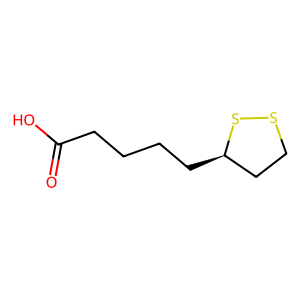

In [16]:
Draw.MolToImage(sorted_df.Mol[1])

In [17]:
b_acid = Chem.MolFromSmiles('O=C(O)c1ccccc1')
fr_COO(b_acid)

1

In [18]:
sorted_df['COOH'] = sorted_df.Mol.apply(fr_COO)

In [19]:
sorted_df['COOH'].value_counts()

0    3317
1     416
2      14
Name: COOH, dtype: int64

In [20]:
acids_df = sorted_df[sorted_df['COOH']==1]

In [21]:
acids_df

,Molecule ChEMBL ID,Molecule Name,Molecular Weight,#RO5 Violations,Smiles,Standard Value,Standard Units,pChEMBL Value,Mol,COOH
1,CHEMBL134342,THIOCTIC ACID,206.33,0,O=C(O)CCCC[C@@H]1CCSS1,0.000,nM,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f965a215120>,1
105,CHEMBL1288533,NaN,313.06,0,O=C(O)C1=Cc2c(ccc(Cl)c2Cl)OC1C(F)(F)F,3.000,nM,8.52,<rdkit.Chem.rdchem.Mol object at 0x7f95a5494e40>,1
127,CHEMBL1077,BROMFENAC,334.17,0,Nc1c(CC(=O)O)cccc1C(=O)c1ccc(Br)cc1,4.803,nM,8.32,<rdkit.Chem.rdchem.Mol object at 0x7f95a548f820>,1
138,CHEMBL1630225,NaN,334.72,0,CC(C)(C)c1cc2c(cc1Cl)C=C(C(=O)O)C(C(F)(F)F)O2,5.000,nM,8.30,<rdkit.Chem.rdchem.Mol object at 0x7f95a548fcf0>,1
140,CHEMBL139,DICLOFENAC,296.15,0,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,5.000,nM,8.30,<rdkit.Chem.rdchem.Mol object at 0x7f95a548fdd0>,1
...,...,...,...,...,...,...,...,...,...,...
3693,CHEMBL1288591,NaN,313.06,0,O=C(O)C1=Cc2ccc(Cl)c(Cl)c2OC1C(F)(F)F,300000.000,nM,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f95a54aa900>,1
3701,CHEMBL1814713,NaN,358.41,0,Cc1ccc(-c2cc(C(C)C(=O)[O-])ccc2CC2CCCC2=O)cc1....,420000.000,nM,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f95a54aac80>,1
3703,CHEMBL1814722,NaN,374.41,0,COc1ccc(-c2cc(CC3CCCC3=O)ccc2C(C)C(=O)[O-])cc1...,430000.000,nM,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f95a54aad60>,1
3717,CHEMBL1814708,NaN,394.18,0,CC(C(=O)[O-])c1ccc(CC2CCCC2=O)cc1I.[Na+],540000.000,nM,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f95a548c3c0>,1


1        True
105      True
127     False
138      True
140     False
        ...  
3693     True
3701     True
3703     True
3717     True
3719     True
Name: Smiles, Length: 416, dtype: bool

In [27]:
acids_df.Smiles.apply(lambda x: x.replace('[2H]', '[H]'))

1                                  O=C(O)CCCC[C@@H]1CCSS1
105                 O=C(O)C1=Cc2c(ccc(Cl)c2Cl)OC1C(F)(F)F
127                   Nc1c(CC(=O)O)cccc1C(=O)c1ccc(Br)cc1
138         CC(C)(C)c1cc2c(cc1Cl)C=C(C(=O)O)C(C(F)(F)F)O2
140                        O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl
                              ...                        
3693                O=C(O)C1=Cc2ccc(Cl)c(Cl)c2OC1C(F)(F)F
3701    Cc1ccc(-c2cc(C(C)C(=O)[O-])ccc2CC2CCCC2=O)cc1....
3703    COc1ccc(-c2cc(CC3CCCC3=O)ccc2C(C)C(=O)[O-])cc1...
3717             CC(C(=O)[O-])c1ccc(CC2CCCC2=O)cc1I.[Na+]
3719    Cc1ccc(-c2cc(CC3CCCC3=O)ccc2C(C)C(=O)[O-])cc1....
Name: Smiles, Length: 416, dtype: object

In [25]:
len(acids_df[acids_df.Smiles.str.contains('[2H]')])

384

In [114]:
acids_df.to_csv('ligand_acid_dataset_v2.csv')

In [32]:
with open('ligands_v2.smi', 'w') as f:

    f.writelines([line + '\n' for line in acids_df.Smiles.to_list()])